<a href="https://colab.research.google.com/github/Yunus-Korkmaz-1335/Yapay-zeka-ve-makine-renmesi-/blob/main/YUNUS_KORKMAZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
df=pd.read_csv("/content/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:

#df.isnull().sum(), df DataFrame'inizin her sütunundaki eksik değerlerin sayısının bir özetini sağlar.
# Bu, veri temizleme ve ön işlemede önemli bir adımdır, çünkü eksik değerler makine öğrenimi modellerinin ve istatistiksel analizlerin performansını etkileyebilir.

df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


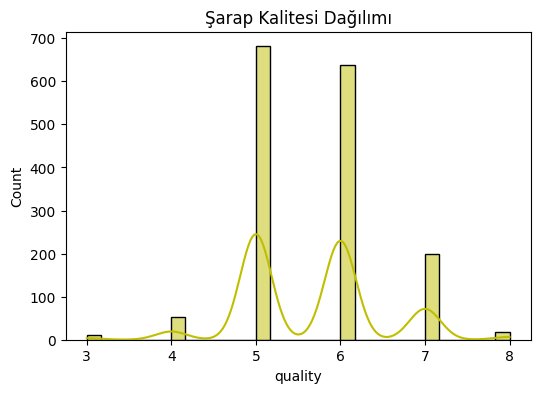

In [54]:
plt.figure(figsize=(6, 4))
sns.histplot(df['quality'], kde=True, color="y")
plt.title('Şarap Kalitesi Dağılımı')
plt.show()

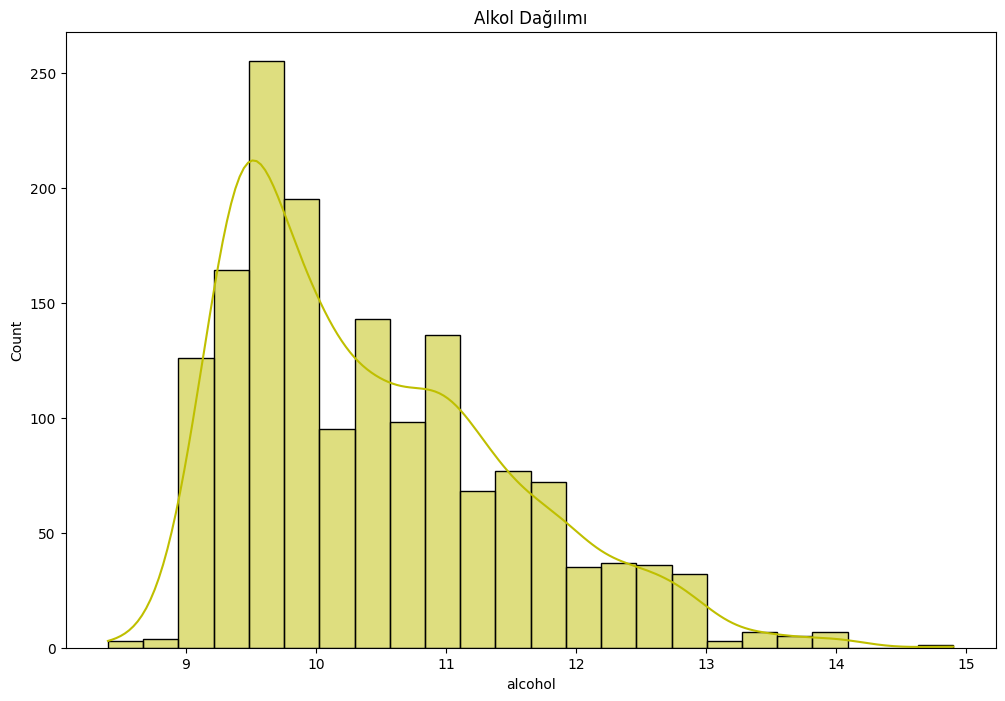

In [55]:
plt.figure(figsize=(12, 8))
sns.histplot(df['alcohol'], kde=True, color="y")
plt.title('Alkol Dağılımı')
plt.show()

In [7]:
x = df.drop('quality', axis=1)
y = df['quality']

In [8]:
# veri setini bölme
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
# Bu kod parçacığı, eğitim verilerindeki özellikleri standardize eder ve ardından bir makine öğrenimi modelinde kullanılmak üzere
# test verilerini hazırlamak için aynı dönüşümü test verilerine uygular.


KNN

KNN algoritması, yeni bir veri noktasını sınıflandırmak veya tahmin etmek için, veri setindeki en yakın "k" sayıda komşusuna bakar. Bu komşuların çoğunluğunun ait olduğu sınıf, yeni veri noktasının sınıfı olarak atanır (sınıflandırma) veya komşuların değerlerinin ortalaması, yeni veri noktasının değeri olarak tahmin edilir (regresyon).

In [62]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn.score(x_test, y_test)

0.18592925775938085

In [11]:
knn.n_neighbors

5

In [60]:
knn.metric

'minkowski'

In [59]:
# model özekllikleri
dir(knn)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'algo

In [64]:
knn.predict(x_test)[0:10]

array([5.6, 5.2, 6.4, 5.6, 6.2, 5.6, 5.2, 5.4, 5.4, 5.4])

In [65]:
#tahmin oluşturma
y_pred = knn.predict(x_test)

In [16]:
y_pred

array([5.6, 5.2, 6.4, 5.6, 6.2, 5.6, 5.2, 5.4, 5.4, 5.4, 6.8, 4.8, 6.2,
       6. , 5.8, 6.6, 5.4, 5.6, 6.4, 5.6, 5.2, 5.6, 6. , 6.2, 5.8, 6. ,
       5.8, 5.4, 5. , 6. , 5. , 5.2, 5. , 5.4, 5.8, 5. , 6.2, 5.6, 5.8,
       5.6, 5.8, 5. , 5.6, 5. , 5.8, 5.4, 6.4, 6. , 5. , 5.4, 5. , 5.4,
       5. , 6.4, 5. , 5.2, 6.2, 6. , 6. , 5.6, 5.6, 6.4, 5.6, 5.4, 5.6,
       5.8, 6.2, 5.4, 5.8, 5.6, 5.8, 5. , 5.8, 5.2, 6.2, 5.2, 5.2, 5.2,
       5.2, 5.4, 5.2, 6. , 6.2, 5.2, 5.8, 5.4, 5.4, 5.6, 6. , 5.2, 5.8,
       5.2, 5. , 5.4, 5. , 5.6, 5.6, 6. , 5.4, 5.4, 5.2, 5. , 5.8, 6. ,
       6. , 6. , 5.6, 5.6, 5.2, 5.2, 6.2, 5.4, 6.6, 5. , 6.4, 6. , 6. ,
       5.4, 5. , 6.4, 5.2, 5.2, 5.8, 5.2, 5.2, 5.8, 5.6, 5.6, 5.2, 6. ,
       5.8, 5.6, 5.4, 6.4, 5.4, 5.8, 5.4, 5.4, 5.6, 5.8, 6. , 5.2, 6.4,
       5.4, 5.4, 5.2, 6. , 6.4, 5.4, 5. , 5.4, 6.2, 5.6, 5.4, 5.8, 5.8,
       5.2, 6. , 5.8, 6. , 5.8, 5.6, 5.4, 5.2, 5.6, 5.6, 5.4, 5.6, 5.4,
       5. , 5.4, 5. , 6.4, 5.8, 5.6, 6. , 5.4, 5.2, 5.2, 6.2, 5.

In [17]:
# rmse
np.sqrt(mean_squared_error(y_test, y_pred))

0.7293833011524187

In [18]:
# mse
mean_squared_error(y_test, y_pred)


0.5319999999999999

In [19]:
# mae
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.5787500000000001

KNN model tuning(parametre optimizasyonu)

In [66]:
# komsu sayısını 1 den 10 değişimine göre sonuçları gözlemleyelim
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k=", k, "için RMSE değeri:", rmse)

k= 1 için RMSE değeri: 0.9013878188659973
k= 2 için RMSE değeri: 0.7915570099493782
k= 3 için RMSE değeri: 0.7548454587971412
k= 4 için RMSE değeri: 0.7426725388756473
k= 5 için RMSE değeri: 0.7293833011524187
k= 6 için RMSE değeri: 0.7282732622061889
k= 7 için RMSE değeri: 0.7319686203823834
k= 8 için RMSE değeri: 0.7382543811248261
k= 9 için RMSE değeri: 0.7429192502188101
k= 10 için RMSE değeri: 0.7356544705226769


In [67]:
# komsu sayısını 1 den 50 değişimine göre sonuçları gözlemleyelim
MAE = []

for k in range(50):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn_model.predict(x_test)
    mae=mean_absolute_error(y_test,y_pred)
    MAE.append(mae)
    print("k=", k, "için MAE değeri:", mae)

k= 1 için MAE değeri: 0.59375
k= 2 için MAE değeri: 0.58125
k= 3 için MAE değeri: 0.584375
k= 4 için MAE değeri: 0.584375
k= 5 için MAE değeri: 0.5787500000000001
k= 6 için MAE değeri: 0.5802083333333334
k= 7 için MAE değeri: 0.5888392857142858
k= 8 için MAE değeri: 0.59765625
k= 9 için MAE değeri: 0.5986111111111111
k= 10 için MAE değeri: 0.5912499999999999
k= 11 için MAE değeri: 0.5911931818181818
k= 12 için MAE değeri: 0.59140625
k= 13 için MAE değeri: 0.5959134615384615
k= 14 için MAE değeri: 0.5912946428571428
k= 15 için MAE değeri: 0.5927083333333334
k= 16 için MAE değeri: 0.59375
k= 17 için MAE değeri: 0.5990808823529411
k= 18 için MAE değeri: 0.5970486111111111
k= 19 için MAE değeri: 0.5958881578947368
k= 20 için MAE değeri: 0.595625
k= 21 için MAE değeri: 0.6007440476190476
k= 22 için MAE değeri: 0.5994318181818181
k= 23 için MAE değeri: 0.5974184782608696
k= 24 için MAE değeri: 0.5970052083333333
k= 25 için MAE değeri: 0.59825
k= 26 için MAE değeri: 0.6018028846153846
k= 27 i

In [68]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [69]:
knn = KNeighborsRegressor()
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(x_train, y_train)
# bu kod parçası KNN regresyon modelinin en iyi "k" değerini bulmak için bir arama yapar ve en iyi parametrelerle eğitilmiş bir modeli knn_cv_model değişkenine kaydeder.
# Bu, modelin daha iyi tahminler yapması için önemli bir adımdir.

In [24]:
knn_cv_model.best_params_

{'n_neighbors': 22}

In [25]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"]).fit(x_train, y_train)

In [26]:
y_pred = knn_tuned.predict(x_test)

Destek Vektör Regresyonu (Support Vector Regression)

In [70]:
svr = SVR().fit(x_train, y_train)

In [71]:
svr

SVR()

In [29]:
svr.predict(x_train)[0:30]

array([5.46425227, 5.30777363, 5.85991185, 5.81979727, 5.31656073,
       4.9703001 , 6.06922378, 5.52228726, 4.85766693, 5.78988017,
       5.98048405, 6.05379324, 5.1051769 , 5.41344666, 5.79725024,
       6.0146428 , 5.78679077, 5.91738827, 5.34490389, 5.07455995,
       6.00986877, 6.16539351, 5.7665351 , 5.44361525, 5.89979332,
       5.51313141, 6.04114361, 5.60713555, 5.6971654 , 5.79518353])

In [30]:
svr.predict(x_test)[0:30]

array([5.41263822, 5.07723242, 5.88358605, 5.74207652, 5.79200952,
       5.52472431, 5.09789303, 5.71466534, 5.60779105, 5.86498041,
       6.07711367, 5.68478452, 5.67298584, 5.66482402, 5.50573446,
       6.10368909, 5.15739438, 5.45424983, 6.0070087 , 5.26405537,
       5.82070394, 5.48050498, 5.9141938 , 6.03895034, 5.72263604,
       5.60182649, 5.95938702, 5.40570088, 5.16225975, 5.78988017])

In [31]:
#rmse
y_pred = svr.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.7297267161479509

In [32]:
svr_params = {"C": [0.1,2.5,2,3]}
# bu kod satırı, Destek Vektör Regresyon modelini optimize etmek için kullanılacak C parametresi için bir dizi değer ayarlar.
#  Kod daha sonra, bu C değerlerinin her biriyle modelin performansını sistematik olarak değerlendirmek ve en iyisini seçmek için GridSearchCV gibi teknikler kullanacaktır.

In [33]:
svr_cv_model = GridSearchCV(svr, svr_params, cv = 10).fit(x_train, y_train)

In [34]:
svr_cv_model.best_params_
#  Bu nitelik, GridSearchCV işlemi sırasında SVR modelinin en iyi performansını sağlayan hiperparametre kombinasyonunu depolar.

{'C': 3}

In [35]:
svr_cv_model = GridSearchCV(svr, svr_params, cv = 10, verbose = 2, n_jobs = -1).fit(x_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [36]:
svr_cv_model.best_params_

{'C': 3}

In [37]:
svr_tuned = SVR( C =3).fit(x_train, y_train)

In [38]:
y_pred = svr_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.6990577537109307

Karar Ağacı (Decision Tree)

In [39]:
dt = DecisionTreeRegressor()

In [40]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [41]:
dt.predict(x_test)[0:10]

array([6., 5., 5., 5., 6., 5., 5., 5., 7., 6.])

In [42]:
y_pred = dt.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.7623975340988454

In [43]:
dt = DecisionTreeRegressor().fit(x_train, y_train)
y_pred = dt.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.7806247497997998

In [44]:
dt_params = {"max_depth": [1,3,4,5,10,20],
              "min_samples_split": [2,10,5,50,40,20]}

In [45]:
dt = DecisionTreeRegressor()
dt_cv_model = GridSearchCV(dt, dt_params, cv = 10).fit(x_train, y_train)

In [46]:
dt_cv_model.best_params_

{'max_depth': 10, 'min_samples_split': 50}

In [47]:
dt_tuned = DecisionTreeRegressor(max_depth = 4, min_samples_split = 50).fit(x_train, y_train)

In [48]:
y_pred = dt_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.6612520453798649

Rastgele Orman

In [49]:
rf_model = RandomForestRegressor(random_state = 42).fit(x_train, y_train)

In [50]:
rf_model

RandomForestRegressor(random_state=42)

In [51]:
y_pred = rf_model.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5488516420673258

In [52]:
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [20, 50, 100, 200],
            "min_samples_split": [2,10,80,100]}

In [73]:
# Çalışma şeklini kontrol eden birçok düğmesi (hiperparametreler) olan bir makineniz olduğunu düşünün. İstenen sonucu elde etmek için en iyi düğme ayarları kombinasyonunu bulmak istiyorsunuz.
# Izgara Arama, tüm olası düğme ayarları kombinasyonlarını sistematik olarak denemek ve hangisinin en iyi sonucu verdiğini kaydetmek gibidir. Izgara Arama tamamlandığında, rf_cv_model en uygun düğme ayarlarına (hiperparametreler) sahip makineyi (Rastgele Orman modeli) içerecektir.

rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(x_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [74]:
rf_cv_model.best_params_
# rf_cv_model.best_params_, GridSearchCV tarafından belirlenen en iyi hiperparametre kombinasyonunu size gösterir.
# Bu bilgiyi kullanarak, modelinizi bu en iyi hiperparametrelerle yeniden eğitebilir ve daha iyi performans elde edebilirsiniz.

{'max_depth': 10,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 50}

In [75]:
rf_model = RandomForestRegressor(random_state = 42,
                                 max_depth = 8,
                                max_features = 2,
                                min_samples_split = 2,
                                 n_estimators = 200)
rf_tuned = rf_model.fit(x_train, y_train)

In [76]:
y_pred = rf_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5797099409108194

Değişken Önem Düzeyi

In [77]:
rf_tuned.feature_importances_*100000

array([ 5854.04519246, 12606.21237333,  6722.93387903,  5183.67402101,
        6930.16143104,  4355.48617306,  7918.73881988,  8501.46285204,
        5277.49593088, 15359.13223902, 21290.65708825])

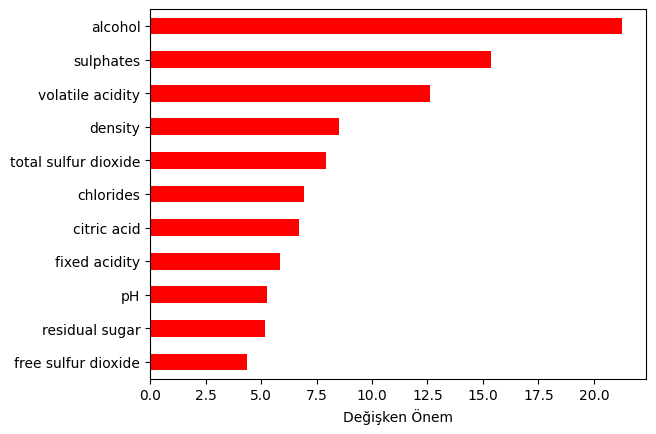

In [78]:
Importance = pd.DataFrame({'Importance':rf_tuned.feature_importances_*100},
                          index = x_train.columns)


Importance.sort_values(by = 'Importance',
                       axis = 0,
                       ascending = True).plot(kind = 'barh',
                                              color = 'r', )

plt.xlabel('Değişken Önem')
plt.gca().legend_ = None